# Decoding Luxury: Key Amenities Driving Airbnb Success

import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Abstract
This study aims to identify key amenities that contribute to luxury classifications in Airbnb listings. Using logistic regression, I analyzed the coefficient values of various amenities to determine their influence on luxury status. Results highlight significant amenities such as 'Air Conditioning' and 'Changing Table' with high positive coefficients, indicating their strong association with luxury properties. Conversely, some amenities, like 'Long-term stays allowed,' negatively correlate with luxury. These insights can guide property owners in enhancing their listings to attract luxury-seeking guests.

# Introduction 

In the competitive Airbnb market, identifying luxury amenities is vital for property success. It enables effective market differentiation, guides investment decisions, meets guest expectations, and supports optimal pricing strategies. This knowledge helps hosts position their properties strategically in the luxury segment.

# Methadology 

- KaggleDataset
- https://www.kaggle.com/datasets/joebeachcapital/airbnb
## EDA Analysis
- Explore dataset and see the trend
- Data Prepocessing
- Drop all the missing values
- Extracted and transformed Amenities column into binary indicators for each amenity
## Methods Used
- Logistic Regression → binary classification on amenities being considered as luxury 
- Chi Squared → identify most impactful amenities on pricing
## Evaluation
Model accuracy was assessed using a confusion matrix and ROC curve.
Coefficient values were analyzed to determine the impact of each amenity on luxury classification.
Significant level for analyzing is 0.05. 
Luxury Price is defined as being above $250


# Performing EDA Analysis

In [2]:
# seperate the all the rows with delimeter off semicolon 
df = pd.read_csv('airbnb-listings.csv', sep=';', header=0)

/var/folders/pk/t3lrg615341fwvd_tk58fqn40000gn/T/ipykernel_3062/492589099.py:2: DtypeWarning: Columns (0,2,66) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb-listings.csv', sep=';', header=0)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494954 entries, 0 to 494953
Data columns (total 89 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              494954 non-null  object 
 1   Listing Url                     494954 non-null  object 
 2   Scrape ID                       494954 non-null  object 
 3   Last Scraped                    494953 non-null  object 
 4   Name                            494536 non-null  object 
 5   Summary                         478753 non-null  object 
 6   Space                           347018 non-null  object 
 7   Description                     494794 non-null  object 
 8   Experiences Offered             494954 non-null  object 
 9   Neighborhood Overview           291604 non-null  object 
 10  Notes                           197590 non-null  object 
 11  Transit                         303786 non-null  object 
 12  Access          

In [4]:
df.describe()

,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,4.949540e+05,379884.000000,494449.000000,494448.000000,494953.000000,494953.000000,494891.000000,493428.000000,494328.000000,494037.000000,...,494952.000000,367134.000000,366237.000000,366479.000000,365918.000000,366434.000000,365969.000000,365873.000000,494087.000000,372947.000000
mean,3.234417e+07,93.376549,9.549721,9.549738,38.042292,-15.020974,3.311584,1.249632,1.378322,1.934525,...,16.740850,92.913988,9.527773,9.328483,9.692770,9.709972,9.471171,9.323047,6.869659,1.479523
std,3.172156e+07,17.592441,57.199523,57.199579,22.941429,70.364294,2.094052,0.607029,0.942508,1.488128,...,32.336701,8.543725,0.852536,1.035356,0.727947,0.719978,0.803260,0.903585,41.977381,1.731931
min,1.900000e+01,0.000000,0.000000,0.000000,-38.224427,-123.218712,1.000000,0.000000,0.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,6.886060e+06,98.000000,1.000000,1.000000,38.913119,-73.969216,2.000000,1.000000,1.000000,1.000000,...,1.000000,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.320000
50%,2.188181e+07,100.000000,1.000000,1.000000,42.310894,2.137584,2.000000,1.000000,1.000000,1.000000,...,4.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.880000
75%,4.792177e+07,100.000000,3.000000,3.000000,51.375424,12.444849,4.000000,1.000000,2.000000,2.000000,...,18.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.030000
max,1.350885e+08,100.000000,1114.000000,1114.000000,55.994889,153.637837,21.000000,10.000000,96.000000,19.000000,...,735.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,752.000000,223.000000


In [5]:
df.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,4008728,https://www.airbnb.com/rooms/4008728,20170402075052,2017-04-02,"Luxurious 3 bedroom, centrum, 180m2",‪This luxurious apartment is situated in the c...,In the heart of hip & lively Amsterdam Centrum...,‪This luxurious apartment is situated in the c...,none,There is a wide variety of cafes and restauran...,...,10.0,10.0,9.0,NaN,Amsterdam,strict,1.0,1.52,"52.36523660409065, 4.878249575101092","Host Has Profile Pic,Host Identity Verified,Is..."
1,7778612,https://www.airbnb.com/rooms/7778612,20170402075052,2017-04-02,Luxury apartment in city centre,"Beautiful, large (105m2, 2 floors) and quiet a...",1 living room 1 dining room 2 bedrooms 1 bathr...,"Beautiful, large (105m2, 2 floors) and quiet a...",none,Within a few minutes walking you'll be in the ...,...,10.0,10.0,9.0,NaN,Amsterdam,strict,1.0,0.81,"52.367309030897516, 4.8738407410699915","Host Is Superhost,Host Has Profile Pic,Host Id..."
2,8264596,https://www.airbnb.com/rooms/8264596,20170402075052,2017-04-02,Cosy apartment across Vondelpark,This central located apartment will make you f...,NaN,This central located apartment will make you f...,none,NaN,...,10.0,10.0,10.0,NaN,Amsterdam,flexible,1.0,0.05,"52.361943953804776, 4.866686522141489","Host Has Profile Pic,Host Identity Verified,Is..."
3,2180729,https://www.airbnb.com/rooms/2180729,20170402075052,2017-04-02,Spacious City Apartment Oud-West,Living like an Amsterdam resident in this ligh...,There are 2 bedrooms each with a double bed. I...,Living like an Amsterdam resident in this ligh...,none,The 85 m2 apartment is located on a quiet stre...,...,9.0,9.0,9.0,NaN,Amsterdam,flexible,1.0,0.62,"52.37014616115532, 4.866281767968382","Host Has Profile Pic,Host Identity Verified,Is..."
4,14463171,https://www.airbnb.com/rooms/14463171,20170402075052,2017-04-02,Cosy Studio Apartment Center Amsterdam,Studio Apartment Centre Amsterdam Perfect stud...,NaN,Studio Apartment Centre Amsterdam Perfect stud...,none,NaN,...,8.0,9.0,9.0,NaN,Amsterdam,moderate,1.0,2.04,"52.368817829014425, 4.871249476925455",Host Has Profile Pic


This code shows the top 10 neighborhoods by average price in the United States. We can see that Observatory Circle has the most expensive average price. We can see that most of the price ranges around 200-300 dollars. 

In [6]:
df["Country"].value_counts()

Country
United States     134545
United Kingdom     61041
France             56562
Spain              45844
Australia          40693
Italy              33146
Canada             30787
Germany            20576
Denmark            20545
Netherlands        15181
Austria             7893
Belgium             7419
Ireland             6729
Hong Kong           6423
Greece              5127
Switzerland         2381
China                 51
Mexico                 2
Vatican City           2
Vanuatu                1
Uruguay                1
Cuba                   1
0                      1
Name: count, dtype: int64

Correlation coefficient between Price and Number of Reviews: -0.0658781457919467


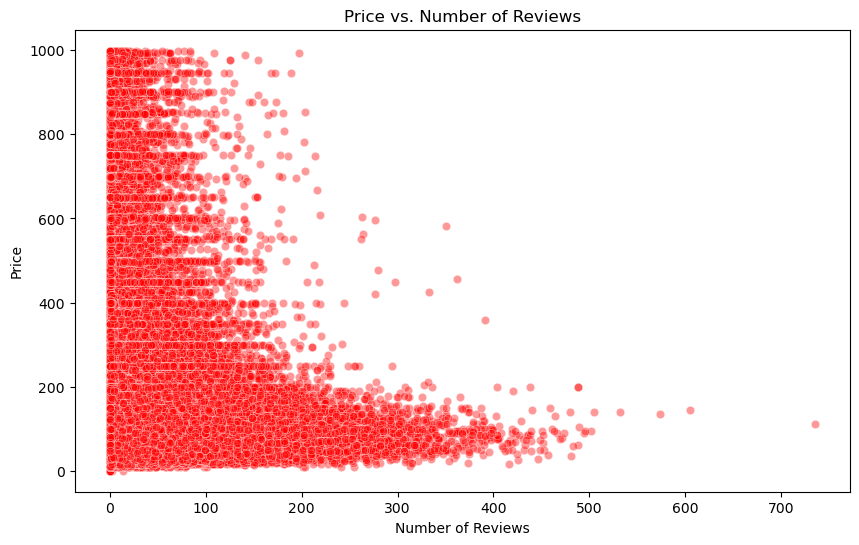

In [7]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Number of Reviews'] = pd.to_numeric(df['Number of Reviews'], errors='coerce')

df_clean = df.dropna(subset=['Price', 'Number of Reviews'])
correlation = df_clean['Price'].corr(df_clean['Number of Reviews'])
print(f"Correlation coefficient between Price and Number of Reviews: {correlation}")


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Number of Reviews', y='Price', alpha=0.4, color='red')
plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

# this plot suggests that lower-priced items or services are more frequently 
# reviewed, while higher-priced items receive fewer reviews

# weak correlation between price and number of reviews

From this graph, we can see that the number of price and reviews are negatively correlated. The more expensive the price, the fewer reviews there are. The correlation coefficient is -0.06.

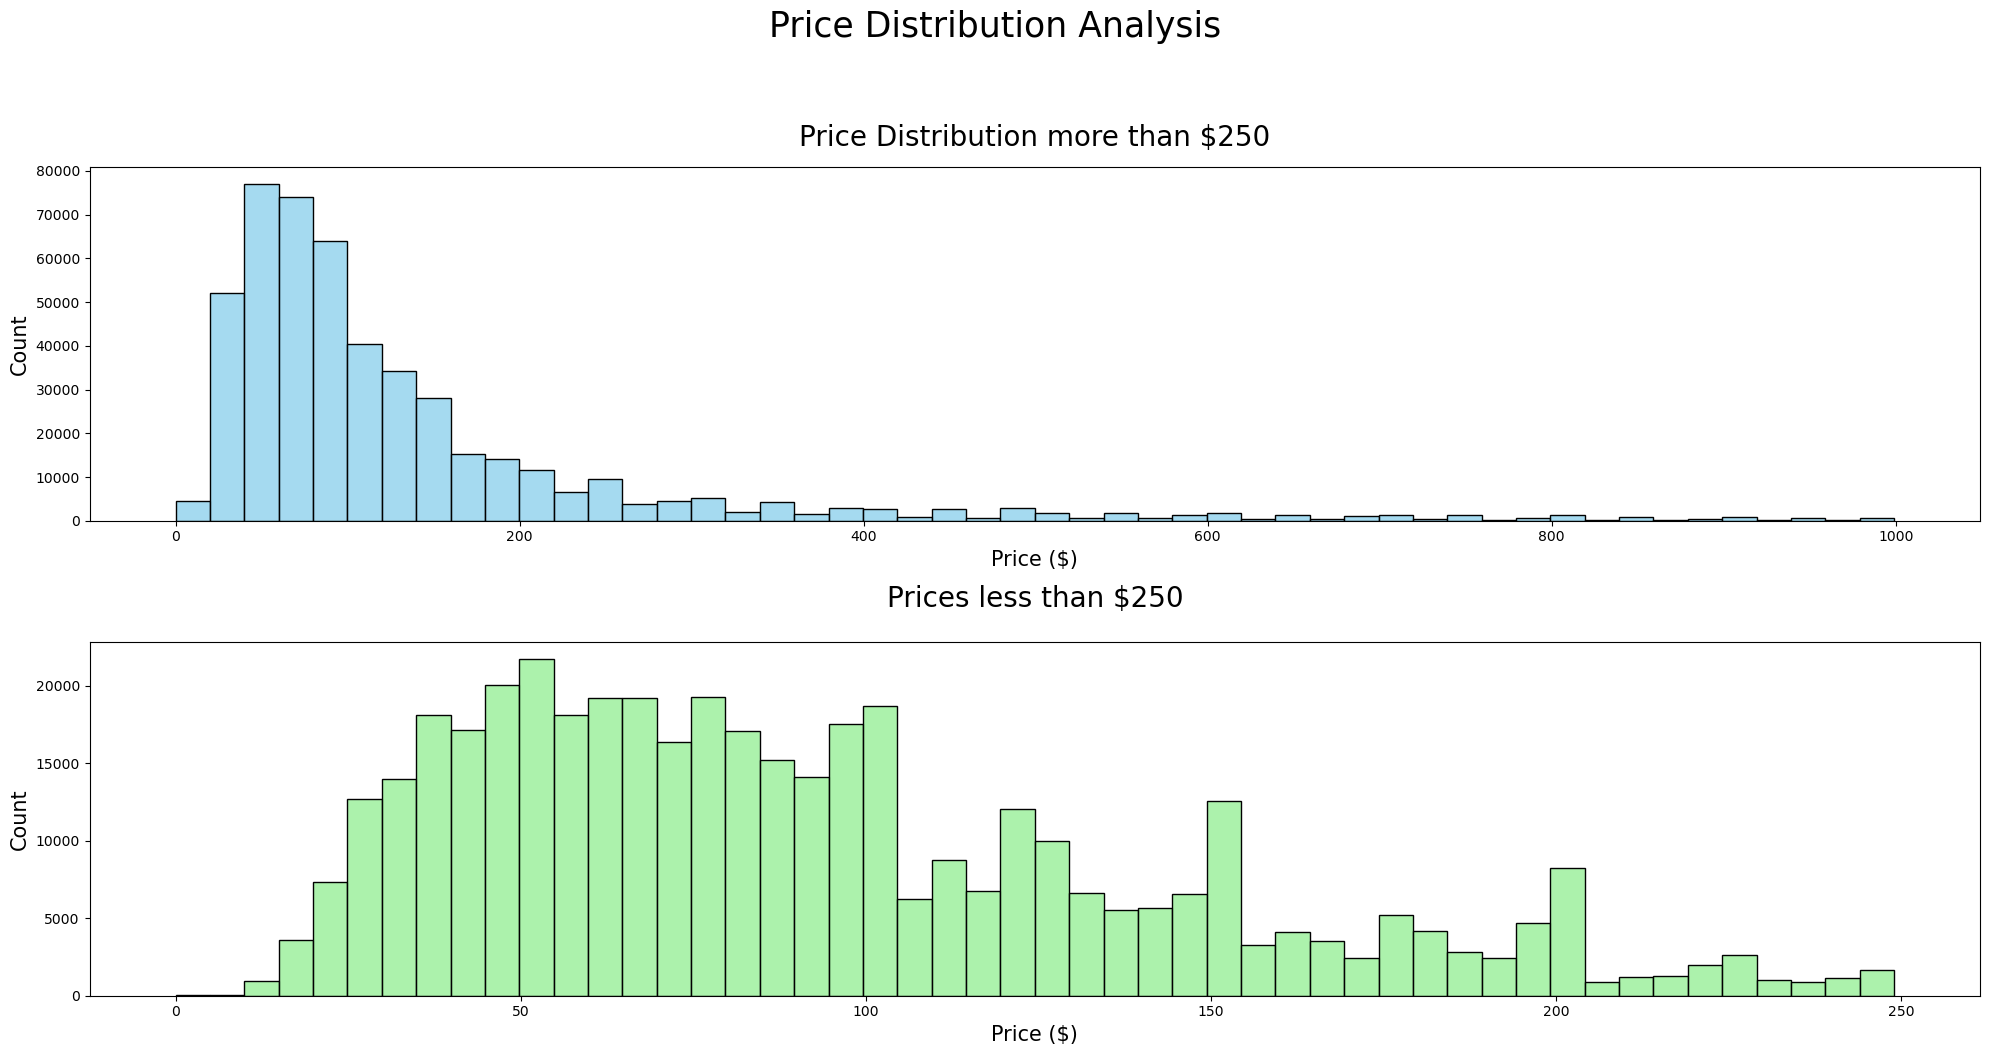

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

sns.histplot(data=df_clean, x='Price', ax=ax1, bins=50, color='skyblue')
ax1.set_title('Price Distribution more than $250', pad=15, fontsize=20)
ax1.set_xlabel('Price ($)').set_fontsize(15)
ax1.set_ylabel('Count').set_fontsize(15)


sns.histplot(data=df_clean[df_clean['Price'] < 250], x='Price', ax=ax2,
            bins=50, color='lightgreen')
ax2.set_title('Prices less than $250', pad=25, fontsize=20)
ax2.set_xlabel('Price ($)').set_fontsize(15)
ax2.set_ylabel('Count').set_fontsize(15)


fig.suptitle('Price Distribution Analysis', fontsize=25, y=1.05)
plt.subplots_adjust(hspace=0.7) # adjust the space between the subplots


plt.tight_layout()
plt.show()

This is the price distributio of the airbnb of my dataset. From the graph, we can see that the price are mostly skewed to the left. Most of the price are around 0-200 dollars.

In [9]:
cscale = [
          [0.0, 'rgb(165,0,38)'], 
          [0.0005, 'rgb(215,48,39)'], 
          [0.007, 'rgb(250, 152, 122)'], 
          [0.08, 'rgb(208, 254, 144)'], 
          [0.1, 'rgb(0, 255, 179)'], 
          [0.3, 'rgb(171,217,233)'], 
          [0.7, 'rgb(116,173,209)'], 
          [0.9, 'rgb(69,117,180)'], 
          [1.0, 'rgb(49,54,149)']
         ]

In [10]:

#dont run if in vscode since it will crash. Takes alot of memory from system. 

# Displays worldMap

# import plotly.express as px

# # Filter the DataFrame to include only listings in the United States
# df_us = df_clean[df_clean['Country'] == 'United States']

# # Define the color scale
# cscale = px.colors.sequential.Viridis

# # Create the scatter_geo plot
# fig = px.scatter_geo(
#     df_us,
#     lat='Latitude',
#     lon='Longitude',
#     color='Price',
#     size='Number of Reviews',
#     color_continuous_scale=cscale,
#     size_max=20,
#     title='Scatter Map of Airbnb Listings in the United States (Price ≤ $700)',
#     range_color=(0, 700),
#     scope='usa'  # Focus on the USA
# )

# # Display the plot
# fig.show()

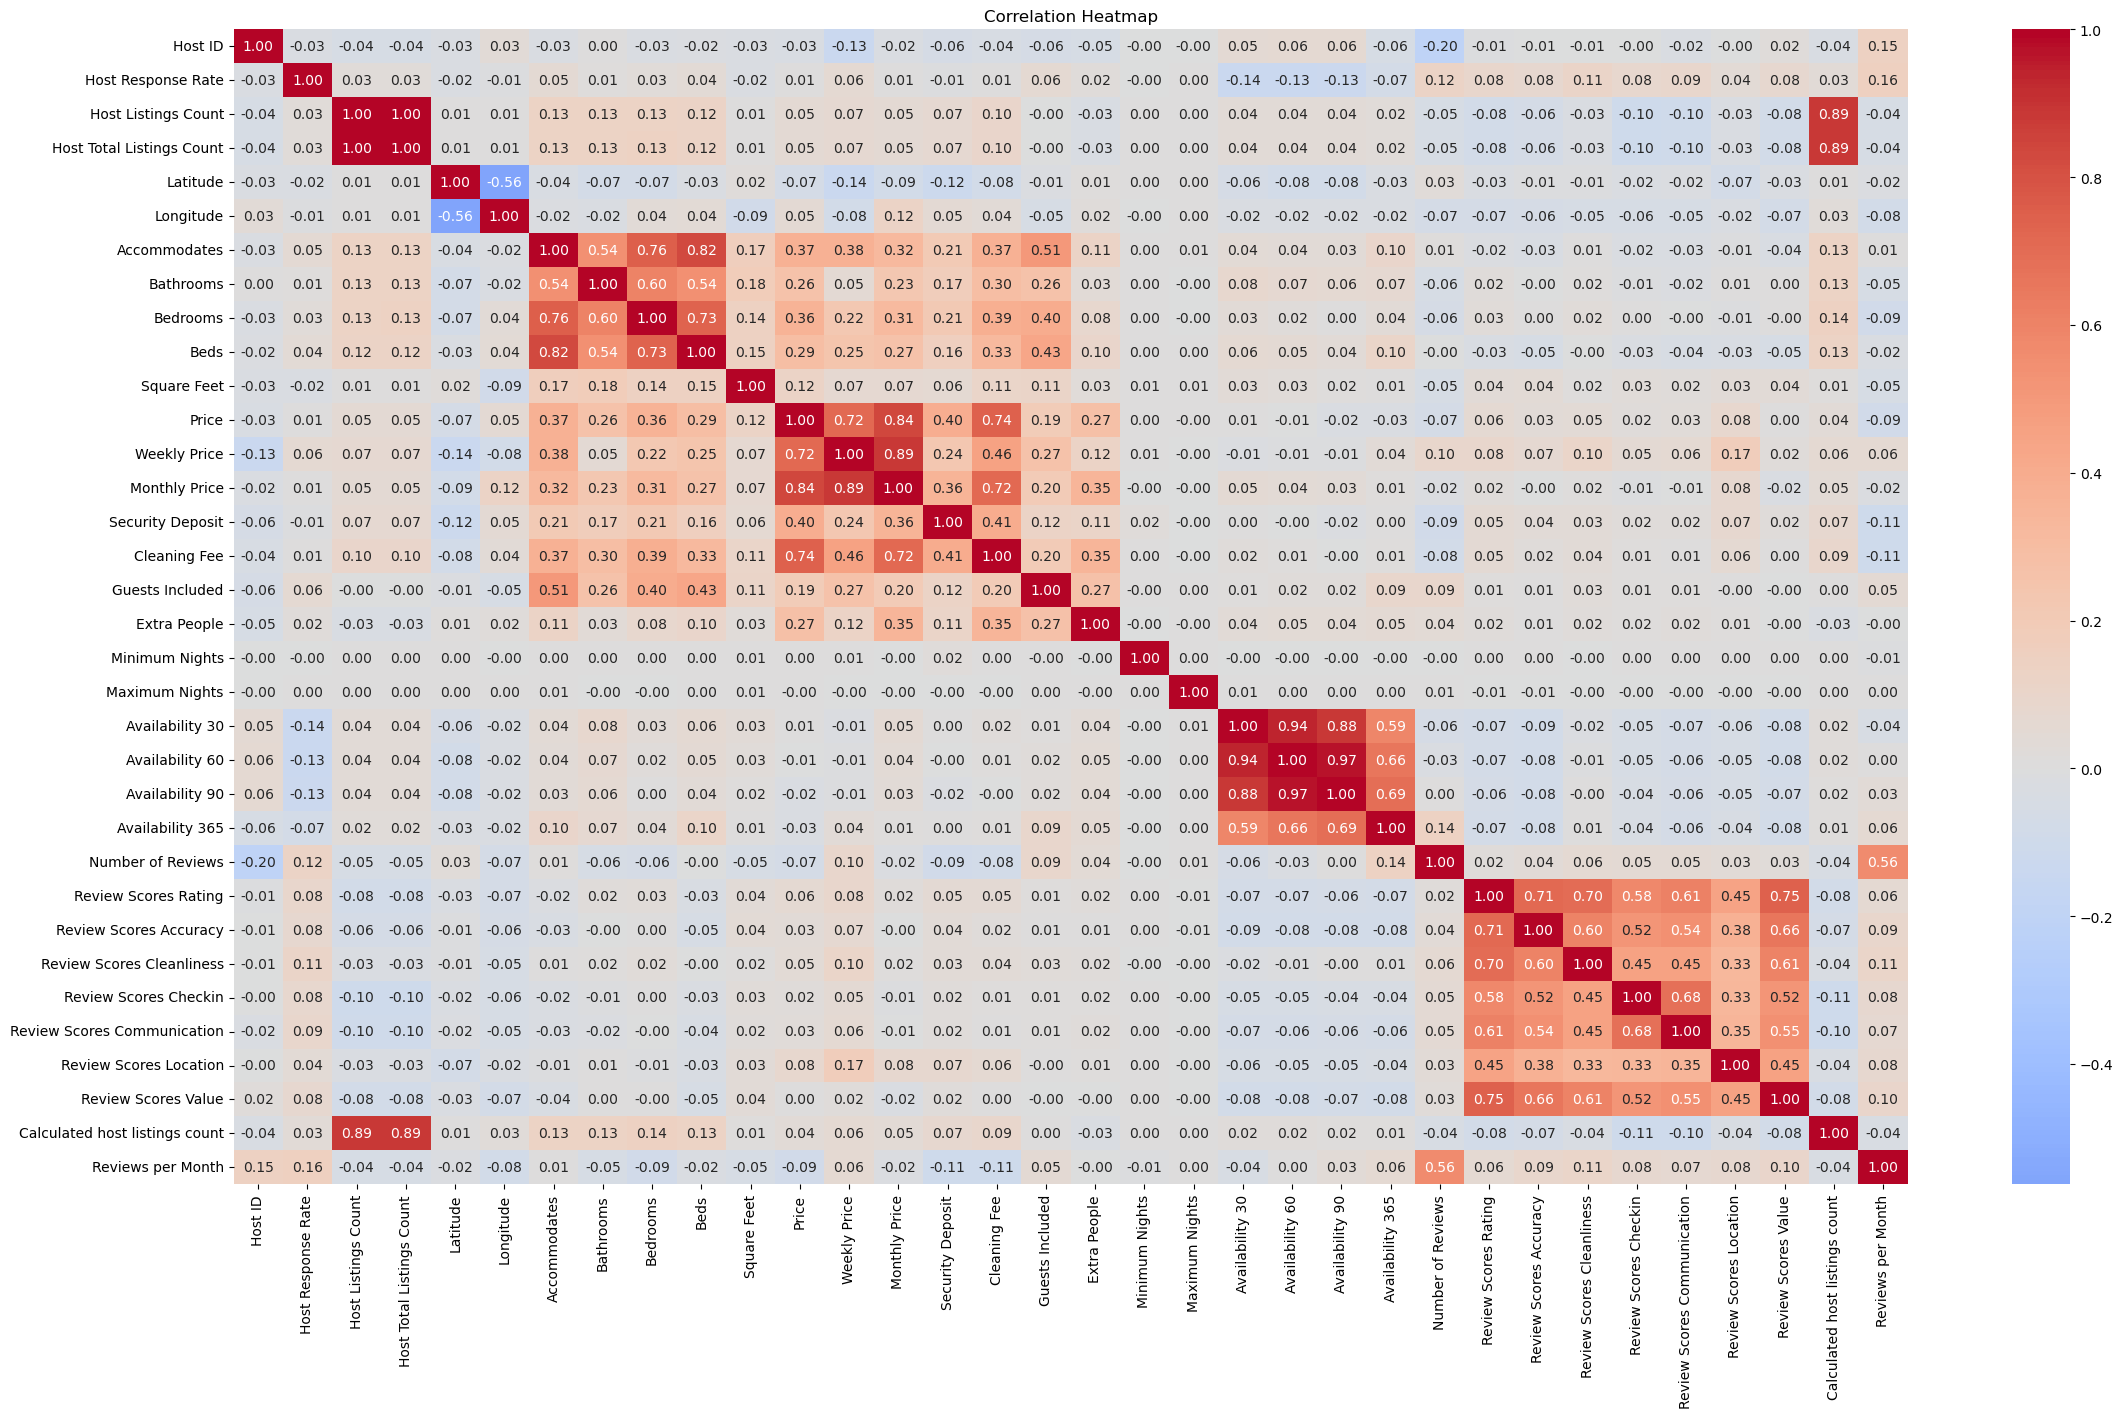

In [11]:

df_num = df.select_dtypes(include=[np.number])
df_heat_corr = df_clean.select_dtypes(include=[np.number]) # get all the numeric types

plt.figure(figsize=(27, 15))
sns.heatmap(df_num.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/


This is the heat correlation map of my dataset, this shows the highest correlation between the price and cleaning fee, wkth correlation 0.74.

In [12]:
df_clean['Room Type'].value_counts()

Room Type
Entire home/apt    306115
Private room       171965
Shared room          8915
Name: count, dtype: int64

In [13]:
# lets find the top 3 countries with most data
df_clean['Country'].value_counts().head(5)

Country
United States     132581
United Kingdom     60966
France             56505
Spain              45732
Australia          40219
Name: count, dtype: int64

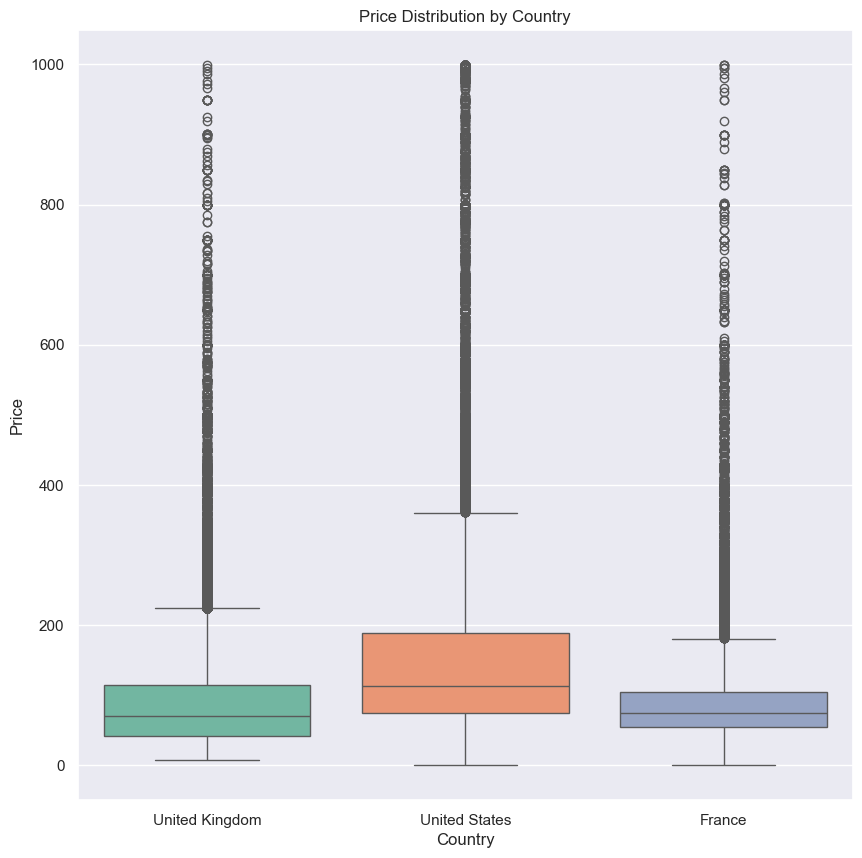

In [14]:
# compare the countries with price

# compare only countries UnitedStates, France, and UK

selected_countries = ['United States', 'France', 'United Kingdom']
filtered_df = df[df['Country'].isin(selected_countries)]
plt.figure(figsize=(10, 10))
sns.set_theme(style='darkgrid')
sns.boxplot(x='Country', y='Price', data=filtered_df, hue='Country', palette='Set2')

plt.title('Price Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Price')
plt.show()


# Oberservation
# -> US market have the highest price and widest variation
# UK and France have similar pricing patterns, both lower than US
# All three have extreme outliers

As you can see from thie boxplot, the country with the msot price variation is United States. France and UK have similar price variation with not that much outliers compared to the United States. The quartile range for the US is also higher than the other two countries.

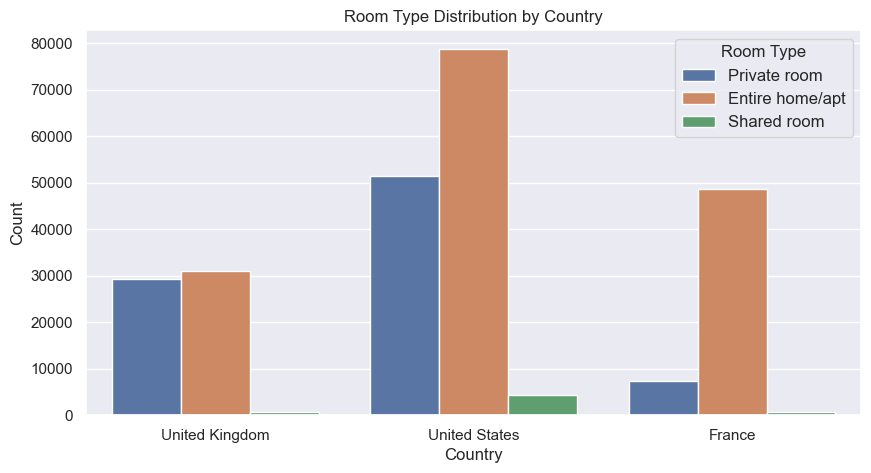

In [15]:
# Lets analyze the room types distribution by country

plt.figure(figsize=(10, 5))
sns.set_theme(style='darkgrid')
sns.countplot(x='Country', hue='Room Type', data=filtered_df)
plt.title('Room Type Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Room Type', fontsize=12)
plt.show()

This is the room type distribution of the dataset. We can see that the most common room type is Entire home/apt, followed by Private room and then Shared room. Again, the United States have the most count in room type with Entire home/apt at almost 80000 frequencies. With least private room at around 8000 is in France. This shows that the Francee prefer shared room compared to the other two countries. 

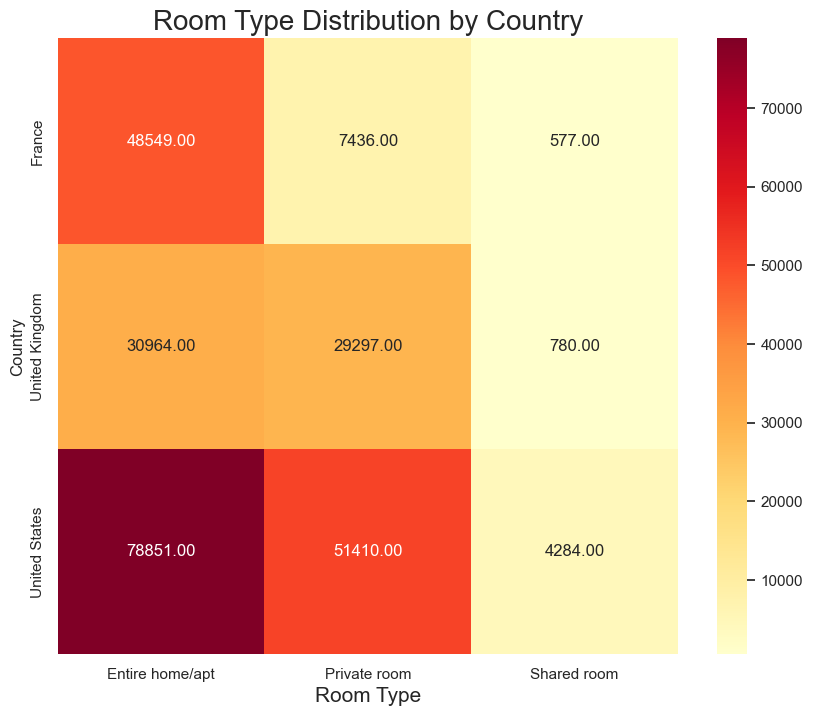

In [16]:
# create the heatmap for the price ranges for the coutnries


cross_table = pd.crosstab(filtered_df['Country'], filtered_df['Room Type'])
# print(cross_table)

plt.figure(figsize=(10, 8))
sns.set_theme(style='darkgrid')
sns.heatmap(cross_table, annot=True, cmap='YlOrRd', fmt='.2f')

plt.title('Room Type Distribution by Country').set_fontsize(20)
plt.xlabel('Room Type').set_fontsize(15)
plt.ylabel('Country')
plt.show()

# https://matplotlib.org/stable/users/explain/colors/colormaps.html

# Question Term Project

## What amenities are most strongly associated with luxury classification in Airbnb listings? 


In [17]:

df_num = df.select_dtypes(include=[np.number])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494954 entries, 0 to 494953
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Host ID                         494954 non-null  int64  
 1   Host Response Rate              379884 non-null  float64
 2   Host Listings Count             494449 non-null  float64
 3   Host Total Listings Count       494448 non-null  float64
 4   Latitude                        494953 non-null  float64
 5   Longitude                       494953 non-null  float64
 6   Accommodates                    494891 non-null  float64
 7   Bathrooms                       493428 non-null  float64
 8   Bedrooms                        494328 non-null  float64
 9   Beds                            494037 non-null  float64
 10  Square Feet                     12209 non-null   float64
 11  Price                           486996 non-null  float64
 12  Weekly Price    

# Hypothesis Question 

## The amenities features provided in luxury listings have a significant impact on user reviews and pricing of those listings.

In [18]:
# make the group into group with and without the amenities and user reviews
amenities_df = df_clean[['Amenities']]

amenities_df

,Amenities
0,"TV,Internet,Wireless Internet,Kitchen,Pets all..."
1,"TV,Cable TV,Internet,Wireless Internet,Kitchen..."
2,"TV,Cable TV,Internet,Wireless Internet,Kitchen..."
3,"TV,Cable TV,Internet,Wireless Internet,Kitchen..."
4,"TV,Wireless Internet,Kitchen,Heating,Smoke det..."
...,...
494949,"TV,Internet,Wireless Internet,Kitchen,Free par..."
494950,"TV,Internet,Wireless Internet,Air conditioning..."
494951,"Wireless Internet,Kitchen,Free parking on prem..."
494952,"TV,Wireless Internet,Wheelchair accessible,Kit..."


Let's start by digesting the Price dataset, clean it, and then perform EDA analysis to understand the data better.

In [19]:
df = df.dropna(subset=['Price'])

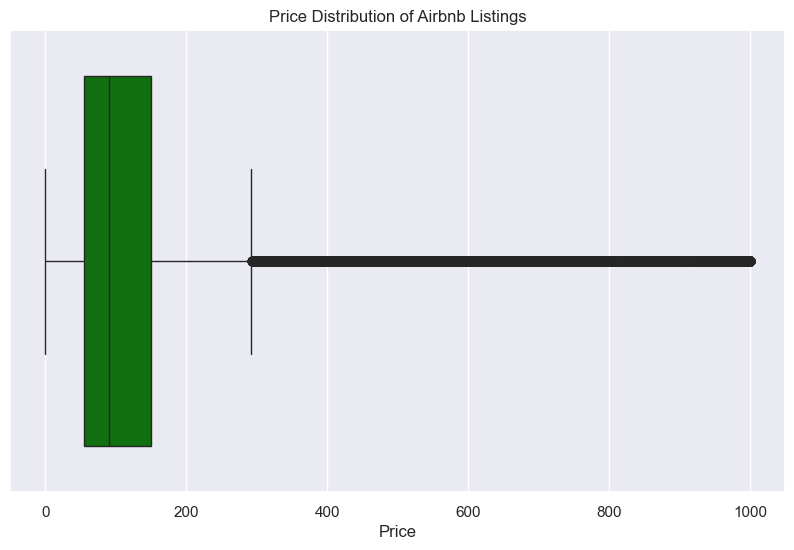

In [20]:
# make a boxplot of the price of the listings in the dataset
plt.figure(figsize=(10, 6))
sns.set_theme(style='darkgrid')
sns.boxplot(data=df_clean, x='Price', color='green')
plt.title('Price Distribution of Airbnb Listings')
plt.xlabel('Price')
plt.show()


As you can see from the price boxplot, the price is mostly skewed to the left. Most of the price are around 0-200 dollars. Whilst there are also many outliers in the dataset.

In [21]:
# give me the price distribution of the dataset

df["Price"].describe()

count    486996.000000
mean        138.072703
std         149.670499
min           0.000000
25%          55.000000
50%          90.000000
75%         150.000000
max         999.000000
Name: Price, dtype: float64

In [22]:
df["Price"].mean()

138.0727028558756

The average of the price is 138 dollars.

In [23]:
luxury_threshold = 250 # try set it to 250
df['Luxury'] = df['Price'] > luxury_threshold

## Let's set the luxury price to 250 dollars and above as being classified as **luxury**.

In [24]:
luxury_df = df[df['Price'] > 250] 
non_luxury_df = df[df['Price'] <= 250]

luxury_stats = luxury_df[['Price', 'Number of Reviews']].describe()
non_luxury_stats = non_luxury_df[['Price', 'Number of Reviews']].describe()

<Axes: xlabel='Luxury', ylabel='Price'>

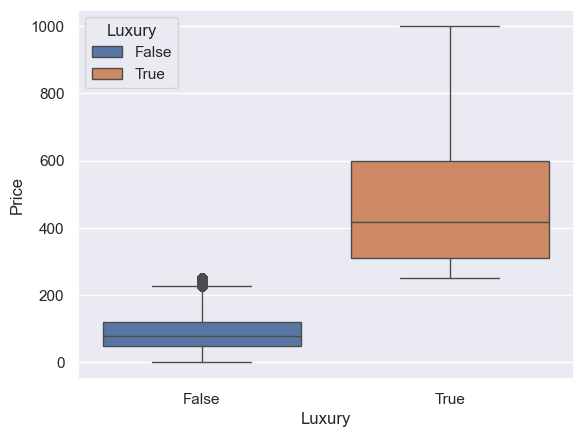

In [25]:
sns.boxplot(x='Luxury', y='Price', hue="Luxury",data=df)


Luxury Properties Statistics:
              Price  Number of Reviews
count  56037.000000       56037.000000
mean     482.684994          10.377108
std      194.938235          20.203644
min      251.000000           0.000000
25%      312.000000           0.000000
50%      419.000000           3.000000
75%      600.000000          11.000000
max      999.000000         391.000000

Non-Luxury Properties Statistics:
               Price  Number of Reviews
count  430959.000000      430958.000000
mean       93.263245          17.723630
std        54.065905          33.684213
min         0.000000           0.000000
25%        50.000000           1.000000
50%        80.000000           5.000000
75%       121.000000          19.000000
max       250.000000         735.000000


<Figure size 1200x600 with 0 Axes>

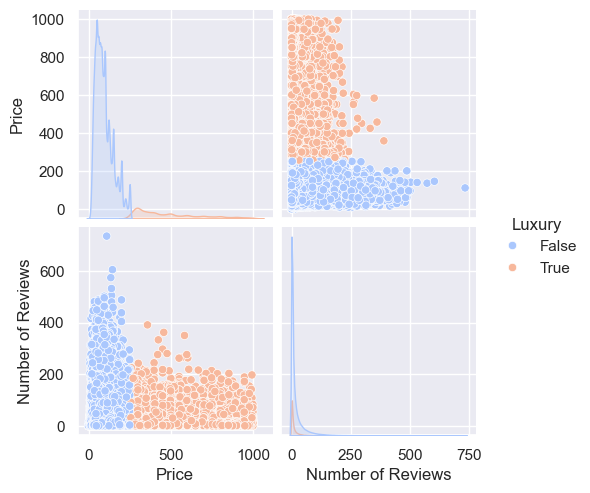

In [26]:
# create luxury and non-luxury DataFrames based on the price threshold
luxury_df = df[df['Price'] > 250]  
non_luxury_df = df[df['Price'] <= 250]


luxury_stats = luxury_df[['Price', 'Number of Reviews']].describe()
non_luxury_stats = non_luxury_df[['Price', 'Number of Reviews']].describe()

print("Luxury Properties Statistics:")
print(luxury_stats)
print("\nNon-Luxury Properties Statistics:")
print(non_luxury_stats)

# plotting histograms for both categories
plt.figure(figsize=(12, 6))

sns.pairplot(df[['Price', 'Number of Reviews', 'Luxury']], hue='Luxury', palette='coolwarm')



This graph demonstrate the price distribution associating with the number of review from the dataset, including the luxury classification as binary variable. THe blue shows a false luxury classification, while the orange is the luxury. Looking at the graph subset on the bottom left, we can see that the higher the number of review, the classification of luxury is false, since the color is blue. When the price range is high, there is lower number of review, and the classification of luxury is true, since the color is orange.

## Let's process the Amenities dataset and clean it in order to analysis

In [27]:
# get the unique values in the amenities column
# find unique strings in the amenities column in all the rows

df['Amenities'] = df['Amenities'].fillna("").str.lower()
amenities_list = df['Amenities'].str.split(',').explode().str.strip().unique().tolist()
amenities_list

['tv',
 'internet',
 'wireless internet',
 'kitchen',
 'pets allowed',
 'indoor fireplace',
 'heating',
 'family/kid friendly',
 'smoke detector',
 'first aid kit',
 'fire extinguisher',
 'essentials',
 'shampoo',
 'hair dryer',
 'iron',
 'laptop friendly workspace',
 'cable tv',
 'washer',
 'dryer',
 '24-hour check-in',
 'hangers',
 'smoking allowed',
 'buzzer/wireless intercom',
 'carbon monoxide detector',
 'translation missing: en.hosting_amenity_50',
 'translation missing: en.hosting_amenity_49',
 'elevator in building',
 'pets live on this property',
 'cat(s)',
 'other pet(s)',
 'safety card',
 'lock on bedroom door',
 'private living room',
 'private entrance',
 'wheelchair accessible',
 'hot tub',
 'suitable for events',
 'breakfast',
 'gym',
 'self check-in',
 'smartlock',
 'keypad',
 'free parking on premises',
 'room-darkening shades',
 'microwave',
 'coffee maker',
 'refrigerator',
 'dishwasher',
 'dishes and silverware',
 'cooking basics',
 'oven',
 'stove',
 'long term st

Let's perform a chi squared test on the amenities column to see if there is a significant difference between the luxury and non-luxury listings. We use chi sqaured test because it is used to determine whether there is a significant association between the two variables. We wanted to see the impact on each amenities on the luxury classification.

In [28]:

for amenity in amenities_list:
    df[amenity] = df['Amenities'].str.contains(amenity.lower()).astype(int)

# run the chi-squared test on these binary columns
from scipy.stats import chi2_contingency

amen_lst_stat = []

# loop through each amenity and run chi-squared test
for amenity in amenities_list:
    contingency_table = pd.crosstab(df['Luxury'], df[amenity])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # append the results to the list
    amen_lst_stat.append((amenity, chi2, p))

    print(f"Amenity: {amenity}")
    print(f"Chi-squared Statistic: {chi2}, P-value: {p}\n")
    


/var/folders/pk/t3lrg615341fwvd_tk58fqn40000gn/T/ipykernel_3062/268221497.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[amenity] = df['Amenities'].str.contains(amenity.lower()).astype(int)
/var/folders/pk/t3lrg615341fwvd_tk58fqn40000gn/T/ipykernel_3062/268221497.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[amenity] = df['Amenities'].str.contains(amenity.lower()).astype(int)
/var/folders/pk/t3lrg615341fwvd_tk58fqn40000gn/T/ipykernel_3062/268221497.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[amenity] = df['Amenities'].str.contains(amenity.lower()).astype(int)
/var/folders/pk/t3lrg615341fwvd_tk58fqn40000gn/T/ipykernel_3062/268221497.py:2: PerformanceWarning: DataFrame is highly fragmented.  This i

Amenity: tv
Chi-squared Statistic: 3758.1070758769374, P-value: 0.0

Amenity: internet
Chi-squared Statistic: 50.849213394059824, P-value: 9.974124018908534e-13

Amenity: wireless internet
Chi-squared Statistic: 49.31348887781777, P-value: 2.181572384765934e-12

Amenity: kitchen
Chi-squared Statistic: 265.4089161214877, P-value: 1.1364419576834671e-59

Amenity: pets allowed
Chi-squared Statistic: 10.403288172297616, P-value: 0.0012579111904003019

Amenity: indoor fireplace
Chi-squared Statistic: 3956.061221836667, P-value: 0.0

Amenity: heating
Chi-squared Statistic: 507.51882459260355, P-value: 2.198112653659813e-112

Amenity: family/kid friendly
Chi-squared Statistic: 5696.140775797225, P-value: 0.0

Amenity: smoke detector
Chi-squared Statistic: 629.6777598176852, P-value: 5.8736174760948e-139

Amenity: first aid kit
Chi-squared Statistic: 74.81531826672528, P-value: 5.168710912116667e-18

Amenity: fire extinguisher
Chi-squared Statistic: 257.2004721424688, P-value: 6.99453496112554

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# sort the list of tuples by the p-values
amenities_vals = [x[0] for x in amen_lst_stat]
chi2_values = [x[1] for x in amen_lst_stat]
p_values = [x[2] for x in amen_lst_stat]

# create a DataFrame from the list of tuples
amenity_df = pd.DataFrame(amen_lst_stat, columns=['Amenity', 'Chi-squared', 'P-value'])
amenity_df



,Amenity,Chi-squared,P-value
0,tv,3758.107076,0.000000e+00
1,internet,50.849213,9.974124e-13
2,wireless internet,49.313489,2.181572e-12
3,kitchen,265.408916,1.136442e-59
4,pets allowed,10.403288,1.257911e-03
...,...,...,...
109,tub with shower bench,0.705545,4.009267e-01
110,grab-rails for shower and toilet,31.257986,2.259163e-08
111,host greets you,91.478682,1.128009e-21
112,beachfront,2.654163,1.032791e-01


In [30]:
#drop the translation missing columns
amenity_df = amenity_df[~amenity_df['Amenity'].str.contains('translation missing')]

amenity_df = amenity_df[amenity_df['P-value'] < 0.05].sort_values(by='Chi-squared', ascending=False)

# drop values where p-values is 0.0 since it could cause by the error in dataset
amenity_df = amenity_df[amenity_df['P-value'] != 0.0]

amenity_df.head(20)

,Amenity,Chi-squared,P-value
37,breakfast,1345.161988,1.733869e-294
36,suitable for events,1314.011318,1.019479e-287
35,hot tub,1085.426863,4.856150e-238
18,dryer,1016.495062,4.665123e-223
71,baby bath,892.725937,3.742154e-196
72,changing table,782.595892,3.281552e-172
50,oven,759.339867,3.737618e-167
75,children’s books and toys,696.259538,1.945787e-153
48,dishes and silverware,661.564026,6.826486e-146
22,buzzer/wireless intercom,652.323787,6.978058e-144


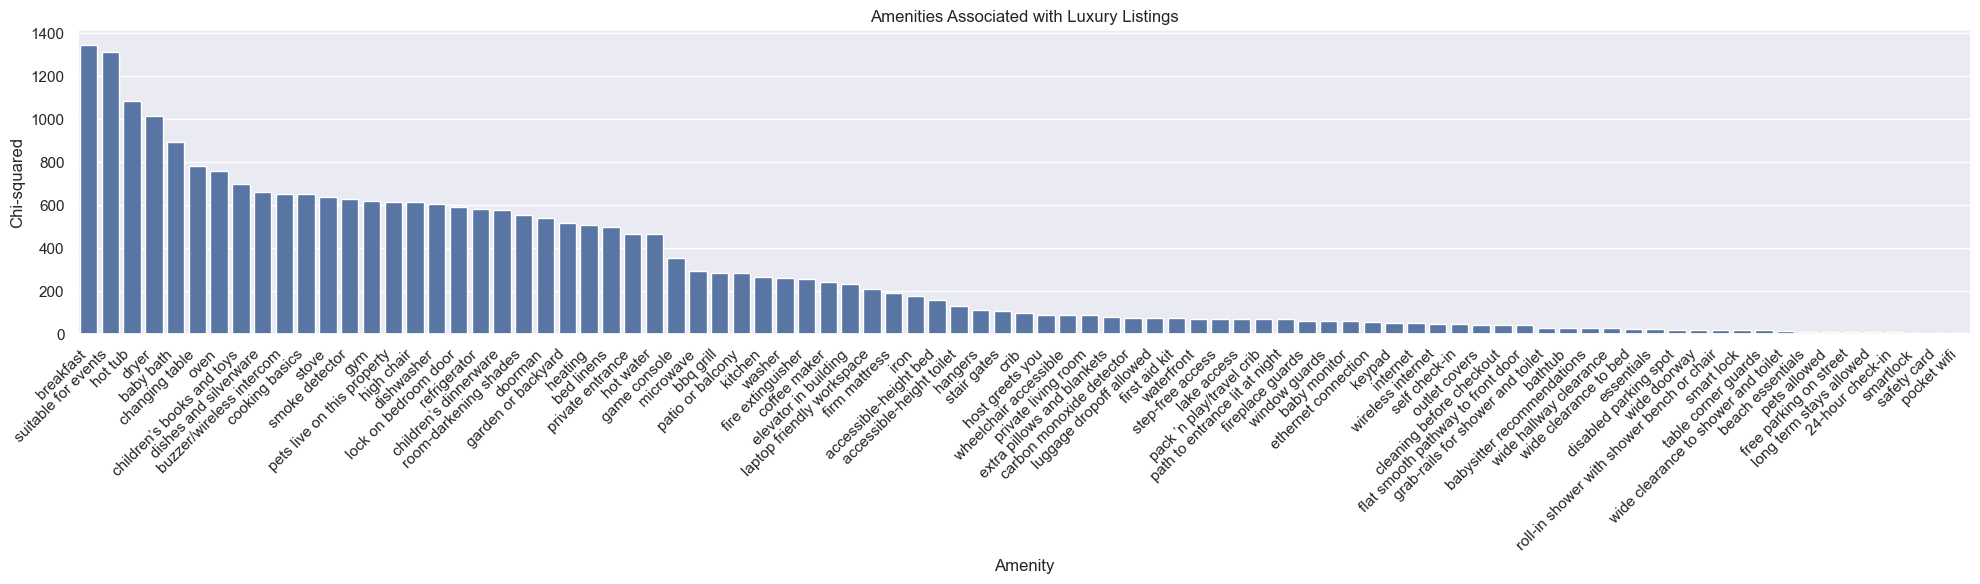

In [31]:
# create a visualization for these

plt.figure(figsize=(20, 6))
sns.barplot(data=amenity_df, x='Amenity', y='Chi-squared')
plt.title('Amenities Associated with Luxury Listings')
plt.xlabel('Amenity')
plt.ylabel('Chi-squared')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


As you can see here from the graph, the top 3 amenties that is most associated with the price are breakfast, suitable for events, and hottub. This is being displayed as a bar-graph since it is easier to see the comparison between the amenities and the chi-squared values.

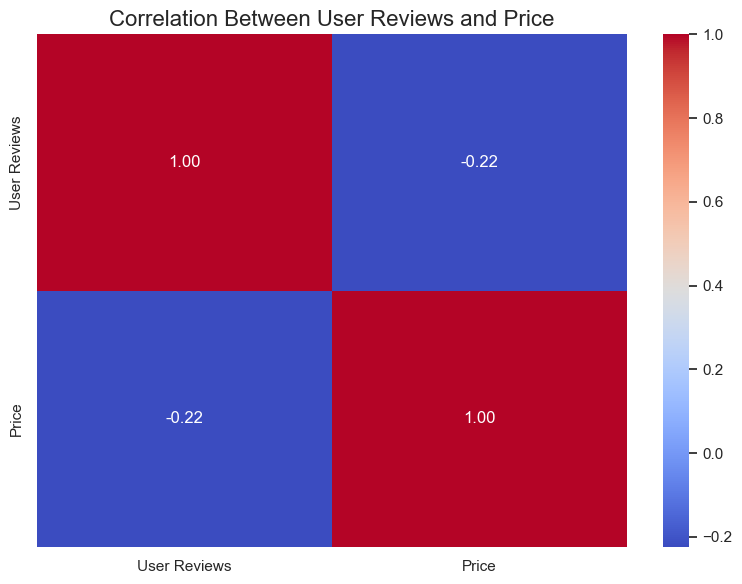

/var/folders/pk/t3lrg615341fwvd_tk58fqn40000gn/T/ipykernel_3062/4003202906.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


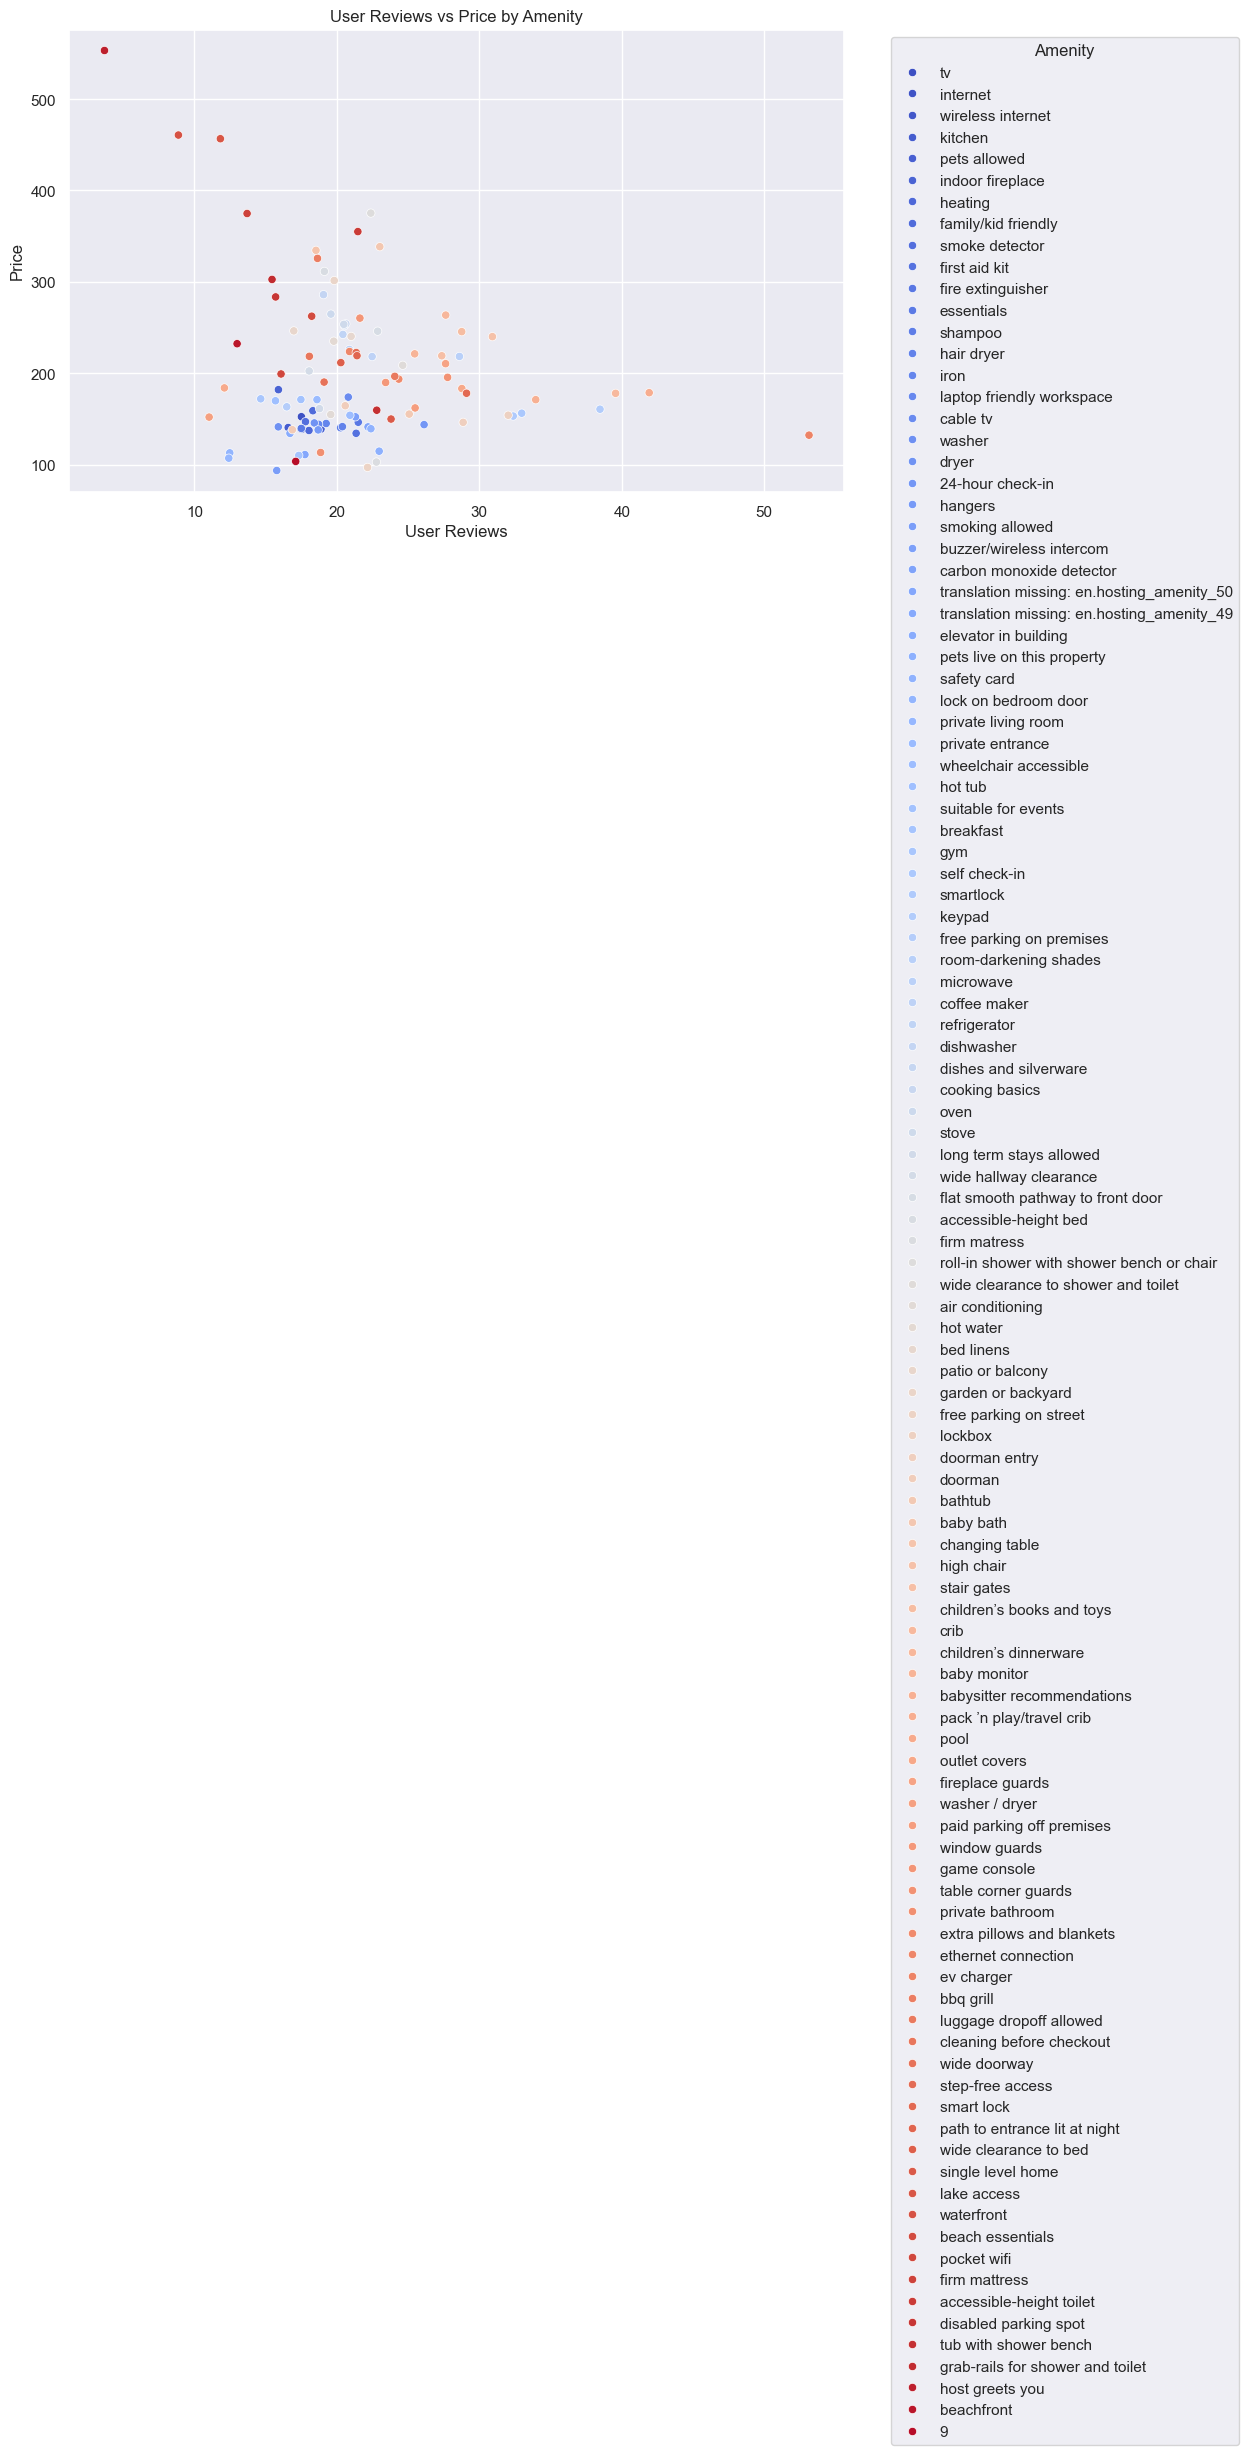

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# group by each amenity to calculate average price and user reviews
amenity_data = []
for amenity in amenities_list:
    filtered_df = df[df[amenity] == 1]
    avg_reviews = filtered_df['Number of Reviews'].mean()  
    avg_price = filtered_df['Price'].mean()  
    amenity_data.append((amenity, avg_reviews, avg_price))


# create a DataFrame from the list of tuples
amenity_df = pd.DataFrame(amenity_data, columns=['Amenity', 'User Reviews', 'Price'])

amenity_df.dropna(inplace=True)

# calculate the correlation between user reviews and price
correlation = amenity_df[['User Reviews', 'Price']].corr()

# create a heatmap to visualize the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Between User Reviews and Price', fontsize=16)
plt.tight_layout()
plt.show()

# create a scatter plot to visualize the relationship between user reviews and price
plt.figure(figsize=(10, 6)) 
scatter = sns.scatterplot(
    x='User Reviews',
    y='Price',
    data=amenity_df,
    hue='Amenity',
    palette='coolwarm'
)


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Amenity') # move the legend outside the plot
plt.xlabel('User Reviews')
plt.ylabel('Price')
plt.title('User Reviews vs Price by Amenity')
plt.tight_layout() 
plt.show()


This is the amenities feature list classification of each feature and its impact on the price. This shows the number review and the amenities feature. As you can see, the luxury amenities, like beachfront, has less reviews compared to the non-luxury amenities. This is because the luxury amenities are more expensive and less people can afford it.

# Test Whether the airbnb listing is Luxury or not using Logistic Regression

In [33]:
# define what is luuxry
df_clean['is_luxury'] = df_clean['Price'] > 250

In [34]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# create a DataFrame with dummy variables for the amenities
df_amenities = df_clean['Amenities'].str.get_dummies(sep=',')
# concatenate the dummy variables with the original DataFrame
df_clean = pd.concat([df_clean, df_amenities], axis=1)

# define the features and target variable
X = df_amenities  
y = df_clean['is_luxury']  # target variable

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# make predictions and evaluate the model
y_pred = model.predict(X_test)


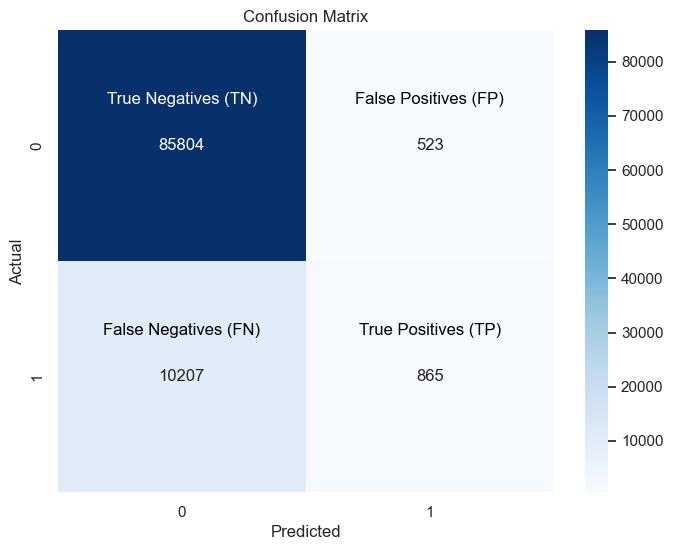

Accuracy: 0.89
F1 Score: 0.14
Confusion Matrix:
[[85804   523]
 [10207   865]]


In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score  # Import f1_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)  # Calculate F1 score
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
ax.text(0.5, 0.3, 'True Negatives (TN)', color='white', ha='center', va='center', fontsize=12)
ax.text(1.5, 0.3, 'False Positives (FP)', color='black', ha='center', va='center', fontsize=12)
ax.text(0.5, 1.3, 'False Negatives (FN)', color='black', ha='center', va='center', fontsize=12)
ax.text(1.5, 1.3, 'True Positives (TP)', color='black', ha='center', va='center', fontsize=12)

plt.title('Confusion Matrix')
plt.show()

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")  # Print F1 score
print("Confusion Matrix:")
print(conf_matrix)


From this result of doing the logistic regression, we can examine that the TN and FN are very high, while the TP and FP are very low. This is because the dataset is imbalanced. The accuracy of the model is 0.89, which is very high. With this confusion matrix, we then use the F1-score to evaluate, and it gave us 0.14. This is because the class is imbalance and the model might be imbalance due to the more number of non luxury. 

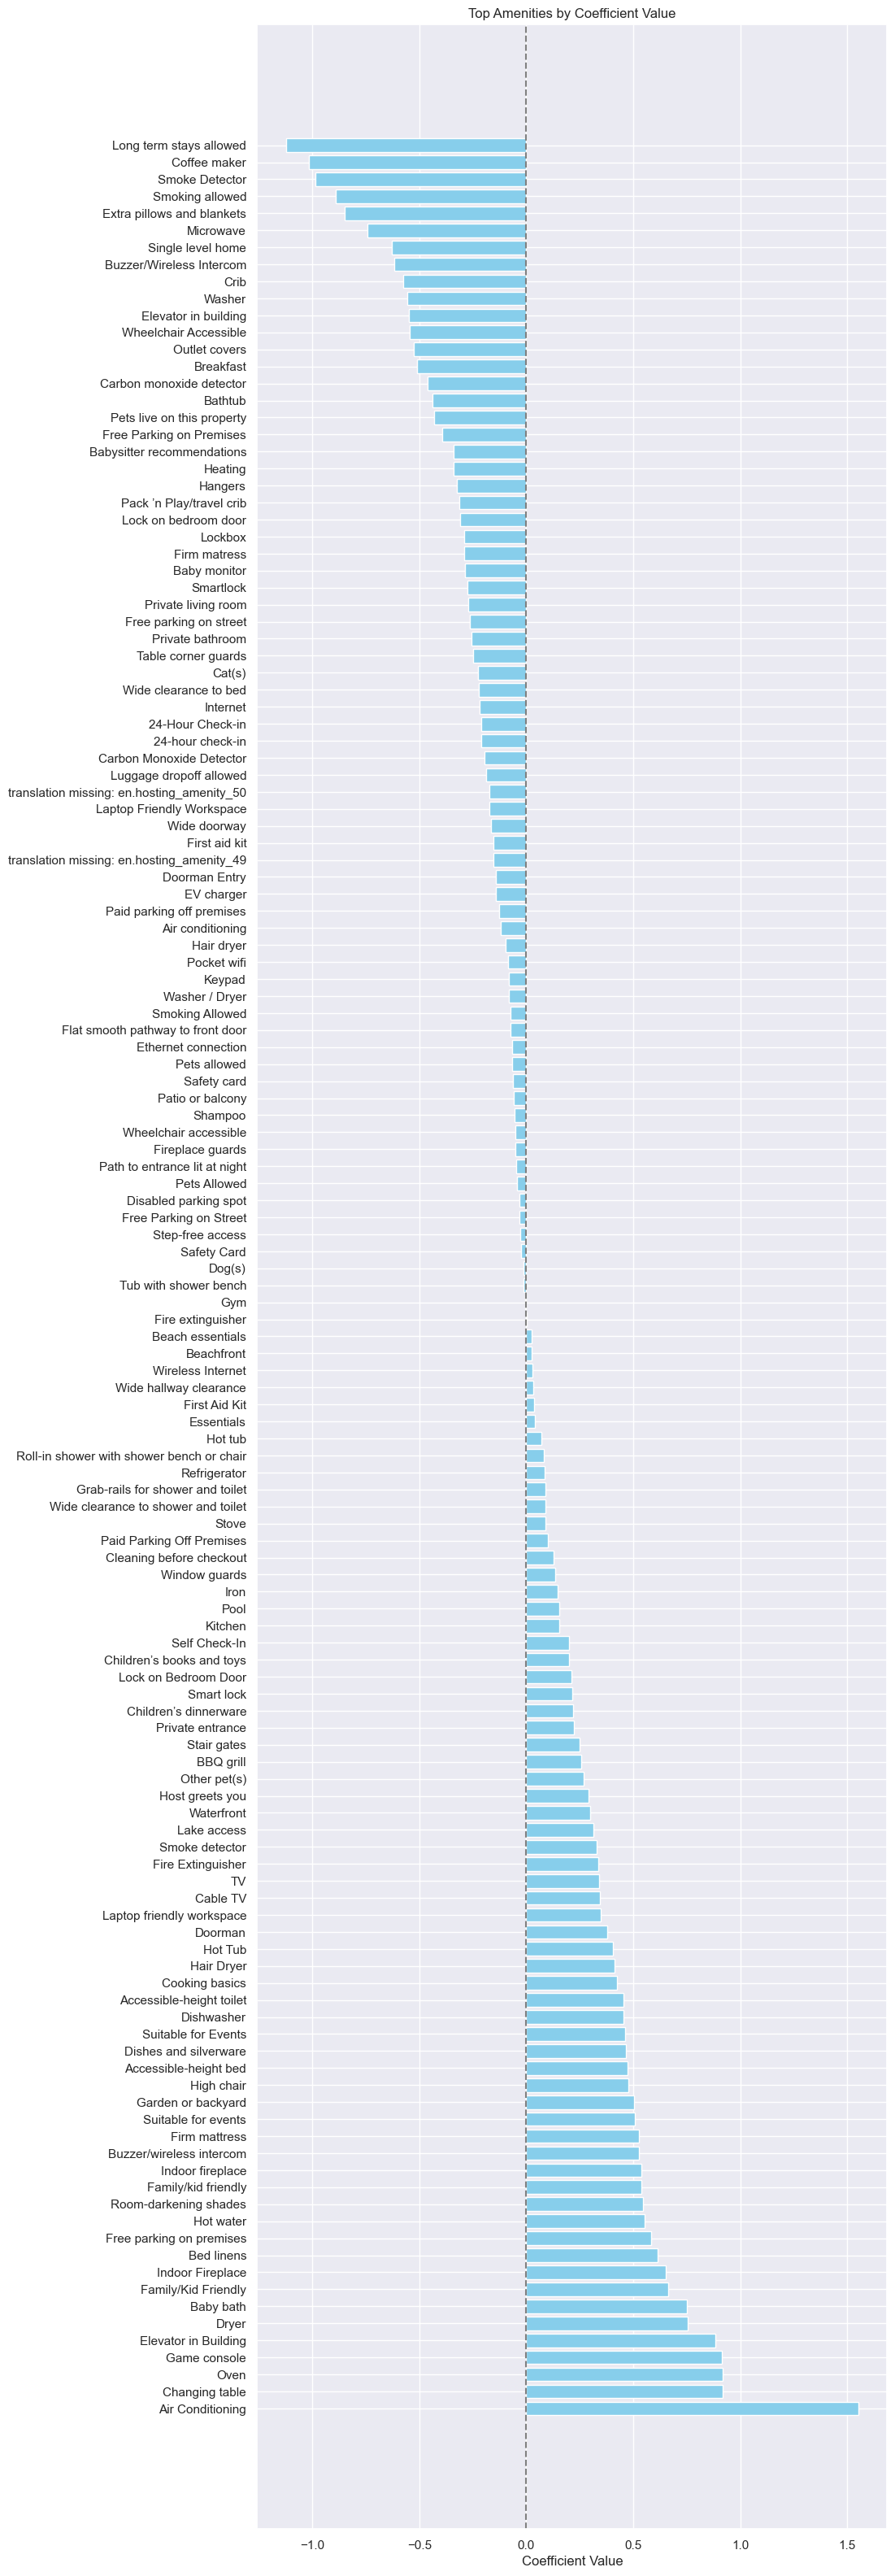

In [36]:

# get the coefficients of the model
coefficients = model.coef_[0]  
# create a DataFrame to display the coefficients
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
# sort the DataFrame by the coefficient values
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# plot the top 20 amenities by coefficient value
plt.figure(figsize=(10, 40))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Top Amenities by Coefficient Value')
plt.axvline(x=0, color='grey', linestyle='--')
plt.show()

This is the coefficient plot from the logistic regression. As you can see, the top 3 amenities that are most associated with luxury classification are Air Conditioning, Changing Table, and Suitable for Events. This is because the coefficient value is very high, indicating that these amenities are very important in determining the luxury classification.

# Test the Accuracy of the model

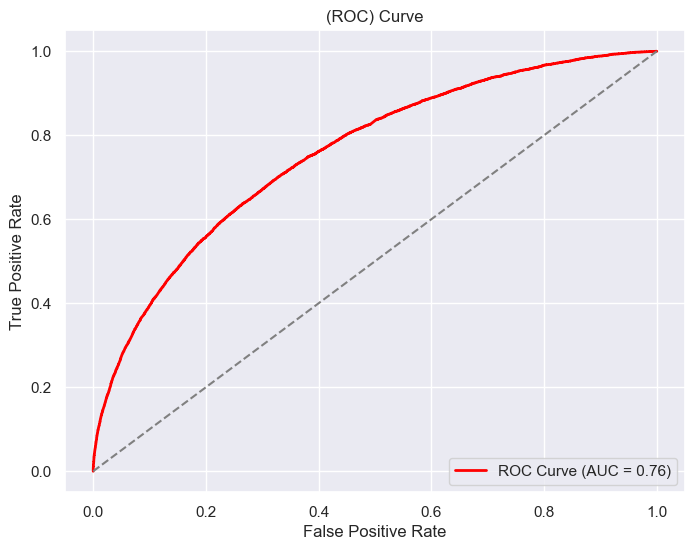

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# calculate the probability of the positive class
y_prob = model.predict_proba(X_test)[:, 1] 
# calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)    
# calculate the AUC
roc_auc = auc(fpr, tpr)                    

# plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.title('(ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()



The ROC-Curve is giving the value of 0.76. The reason why we use ROC curve is because it is a graphical representation of the true positive rate against the false positive rate. This is useful because it helps us to see the performance of the model. The AUC value is 0.76, which is quite high. This means that the model is quite good at predicting the luxury classification.  The ROC curve is also very close to the top left corner, which is a good sign.

## Result Insights 

Strong Luxury Indicators
Air conditioning, changing tables, and outdoor furniture show the highest positive correlations with luxury classifications
These amenities have significant coefficient values in our logistic regression model

Negative Correlations
Long-term stays and certain basic amenities show negative correlations with luxury status
This suggests luxury properties tend to focus on short-term, high-end experiences

Model Performance
The logistic regression model achieved strong predictive accuracy in identifying luxury properties
The ROC curve and confusion matrix demonstrate reliable classification capabilities. 
The dataset appears heavily skewed towards non-luxury listings, which may explain why the model struggles to identify luxury listings correctly.

Practical Implications:
Property owners can strategically invest in high-impact amenities to enhance luxury appeal
The findings provide a data-driven approach to luxury property development and marketing
Increased Demand from travelers
Unique Features

Future Research Directions:
Investigate regional variations in luxury amenity preferences
Analyze seasonal impacts on luxury property demand and pricing
Study the relationship between amenity combinations and guest satisfaction scores can improve the accuracy


# Discussion and Conclusion 

This research demonstrates that specific amenities serve as reliable indicators of luxury status in Airbnb listings. The analysis confirms that specific amenities strongly influence the likelihood of an Airbnb listing being classified as luxury. Key amenities such as 'Air Conditioning' and 'Game Console' have significant positive impacts on listing price. However, model performance highlights challenges in identifying all luxury listings accurately, suggesting opportunities for future improvements in handling class imbalances and refining predictive models. For further improvements, future research could explore regional variations in luxury amenity preferences, seasonal impacts on luxury property demand, and the relationship between amenity combinations and guest satisfaction scores. These insights can guide property owners in enhancing their listings to attract luxury-seeking guests and optimize their property investments.

Special thanks to Aj. Kritya and Phorutai for their invaluable guidance and insights throughout this research project.

Citations:
https://www.kaggle.com/datasets/joebeachcapital/airbnb